[[-1.  4.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 2. -1.  0.  0.]]


[[-1.          4.         -3.          0.66666667]
 [ 0.          1.         -1.          0.        ]
 [ 2.         -1.          0.          0.        ]]

P(x) =  4.0  +  -3.0 (x - -1.0 ) + 0.6666666666666666 (x - -1.0 ) (x - 0.0 ) 

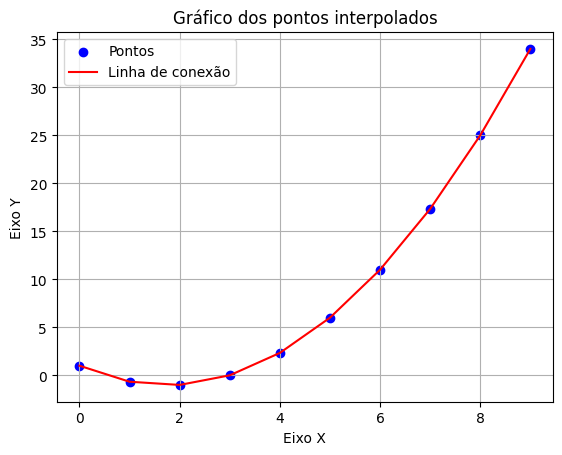

In [141]:
import numpy as np
import csv
import matplotlib.pyplot as plt

def imprimirGrafico(x,y):
    # Criando o gráfico de dispersão e conectando os pontos com linhas
    plt.scatter(x, y, color='blue', marker='o', label='Pontos')
    plt.plot(x, y, color='red', linestyle='-', label='Linha de conexão')

    # Adicionando título e rótulos aos eixos
    plt.title('Gráfico dos pontos interpolados')
    plt.xlabel('Eixo X')
    plt.ylabel('Eixo Y')

    # Adicionando uma grade
    plt.grid(True)

    # Exibindo a legenda
    plt.legend()

    # Exibindo o gráfico
    plt.show()

def pegarDadosCsv():
    T = []

    # Coloca os dados do .csv na matriz T
    with open('pontosQ7.csv', newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')

        pulaLinha1 = True

        for row in spamreader:

            # Pula a linha que tem as letras 'x' e 'y'
            if pulaLinha1:
                pulaLinha1 = False
                continue

            result = row[0].split(',')
            T.append((float(result[0]), float(result[1])))

    return T

def processaDiferencasDivididas(mT, qntLinhasMatrizTriangular):

    for i in range(2,qntLinhasMatrizTriangular+1): 
        for j in range(qntLinhasMatrizTriangular+1-i):
            mT[j,i]=(mT[j+1,i-1]-mT[j,i-1])/(mT[j + (i - 1), 0]-mT[j][0])

    return mT

def multiplicaPolinomio(mT, contador, x):
    mult = 1

    for i in range(contador):
        mult *= (x - mT[i][0])

    return mult

def imprimirMultiplicaPolinomio(mT, contador, x):

    for i in range(contador):
         print("(x -", mT[i][0], ")", end=' ')

def imprimirPolinomio(matrizTriangular):
    print("\nP(x) = ", matrizTriangular[0][1], " + ", end=' ')
    
    contador = 1

    for i in range(2, (qntLinhasMatrizTriangular + 1)):
        print(matrizTriangular[0][i], end=' ')
        imprimirMultiplicaPolinomio(matrizTriangular, contador, x)

        if qntLinhasMatrizTriangular - 1 == contador:
            continue

        print("+", end=' ')
        contador += 1

def calcularPontoNoPolinomio(qntLinhasMatrizTriangular, matrizTriangular, ponto):

    somatorio = 0
    contador = 1

    for i in range(2, (qntLinhasMatrizTriangular + 1)):
        somatorio += matrizTriangular[0][i] * multiplicaPolinomio(matrizTriangular, contador, ponto)
        contador += 1

    valorInterpolado = matrizTriangular[0][1] + somatorio

    return valorInterpolado

T = np.array(pegarDadosCsv())  
qntLinhasMatrizTriangular = len(T)
qntColunasMatrizTriangular = len(T)+1

matrizTriangular = np.zeros([qntLinhasMatrizTriangular,qntColunasMatrizTriangular])

# Preenche a primeira coluna da matriz triangular com X e a segunda coluna com Y
for i in range(qntLinhasMatrizTriangular):
    matrizTriangular[i][0] = T[i][0]
    matrizTriangular[i][1] = T[i][1]

print(matrizTriangular)
print("\n")

matrizTriangular = processaDiferencasDivididas(matrizTriangular, qntLinhasMatrizTriangular)

print(matrizTriangular)

imprimirPolinomio(matrizTriangular)

# intervalo de 0 até n para conseguir os pontos para o gráfico

n = 10

x = []
y = []

for i in range(n):
    x.append(i) 
    y.append(calcularPontoNoPolinomio(qntLinhasMatrizTriangular, matrizTriangular, i))

imprimirGrafico(x,y)


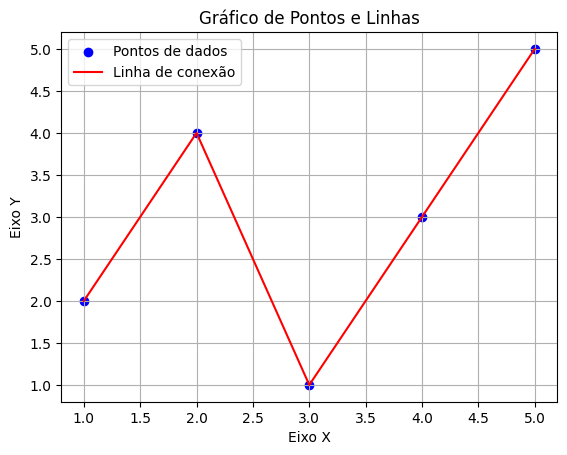

In [ ]:

import numpy as np

# Exemplos de vetores x e y
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 1, 3, 5])





    Lógica para resolvar matriz triangular
    
    '''
    mT[0][2] = (mT[1][1] - mT[0][1]) / (mT[1][0] - mT[0][0])  
    print(mT, "\n")
    mT[1][2] = (mT[2][1] - mT[1][1]) / (mT[2][0] - mT[1][0])  
    print(mT, "\n")
    mT[0][3] = (mT[1][2] - mT[0][2]) / (mT[2][0] - mT[0][0])  
    print(mT, "\n")
    '''